In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def local_regression(x0,X,y,tau):
  x0=np.r_[1,x0]  
  X=np.c_[np.ones(len(X)),X]
  xw=X.T*radial_kernel(x0,X,tau)  #X.T : .T indicates transpose of matrix
  beta=np.linalg.pinv(xw @ X) @xw @ y
  return x0 @ beta

In [ ]:
#this below block of code is just to understand how np.r_ works
print(np.r_[np.array([1,2,3]),0,0,0,np.array([4,5,6])])
print(np.c_[np.array([1,2,3]), np.array([4,5,6])])

[1 2 3 0 0 0 4 5 6]
[[1 4]
 [2 5]
 [3 6]]


In [3]:
def radial_kernel(x0,X,tau):
  return np.exp(np.sum((X-x0)**2,axis=1)/(-2*tau*tau))

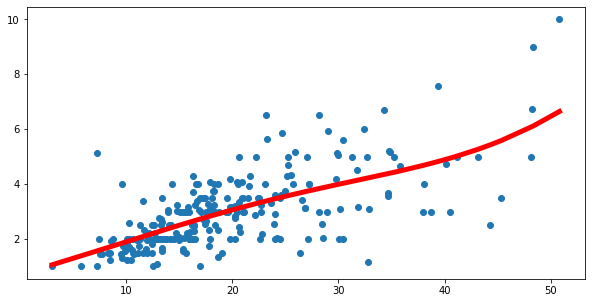

In [19]:
data=pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv")
bill=data.total_bill.values
tip=data.tip.values
tau=10
ypred=np.array([local_regression(x0,bill,tip,tau)for x0 in bill])
SortIndex= bill.argsort(0) #Return the integer indices that would sort the Series values.
xsort=bill[SortIndex]
plt.figure(figsize=(10,5))
plt.scatter(bill,tip)
plt.plot(xsort,ypred[SortIndex],color='red',linewidth=5)


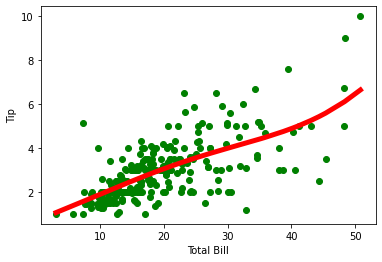

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv")
bill=data.total_bill.values
#print(bill)
tip=data.tip.values
tau=10
ypred=np.array([local_regression(x0,bill,tip,tau)for x0 in bill])
#print("YPRED",ypred)
SortIndex= bill.argsort(0) #Return the integer indices that would sort the Series values.
xsort=bill[SortIndex]

plt.scatter(bill,tip,color='green')
plt.plot(xsort,ypred[SortIndex], color='red', linewidth=5)

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()